In [1]:
import re, os
import unicodedata
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk.sentiment

from wordcloud import WordCloud

from acquire_c import *
from prepare_c import *
from explore_c import *

import warnings
warnings.simplefilter('ignore')

plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

## Acquire data and find the dominant language in each row

In [3]:
# You can pass a threshold argument but the default is 75
df = get_readme_data(lang = 'javascript', lang_threshold= 100)

In [4]:
lang = 'javascript'
not_lang = f'not_{lang}'
# df['label']  = df.prog_lang.apply(lambda x: lang_or_not(x, lang))
java_obj = NLP_explore(df, 'label', 'cleaned', lang, not_lang)

## Explore

### Look at word freqencies for JavaScript
|          |   word_count |
|:---------|-------------:|
| data     |        25128 |
| use      |        20312 |
| gt       |        19874 |
| yes      |        19795 |
| code     |        18020 |
| python   |        17961 |
| using    |        17762 |
| top      |        16057 |
| project  |        15087 |
| 1        |        13589 |
| run      |        13366 |
| api      |        12797 |
| unknown  |        12742 |
| github   |        12660 |
| file     |        12109 |
| learning |        11736 |
| open     |        11354 |
| app      |        11260 |
| create   |        10836 |
| 2        |        10439 |

In [5]:
# print(pd.DataFrame({'word_count': java_obj.all_freq}).head(20).to_markdown())

## Look at some word count visualizations

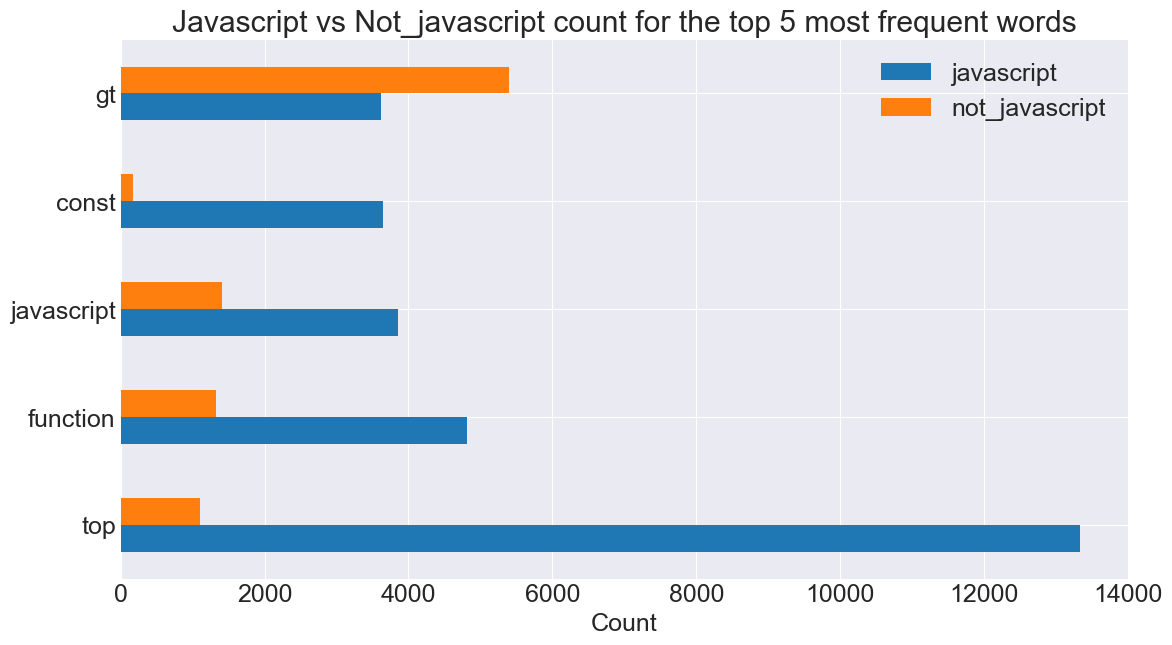

<Figure size 1600x900 with 0 Axes>

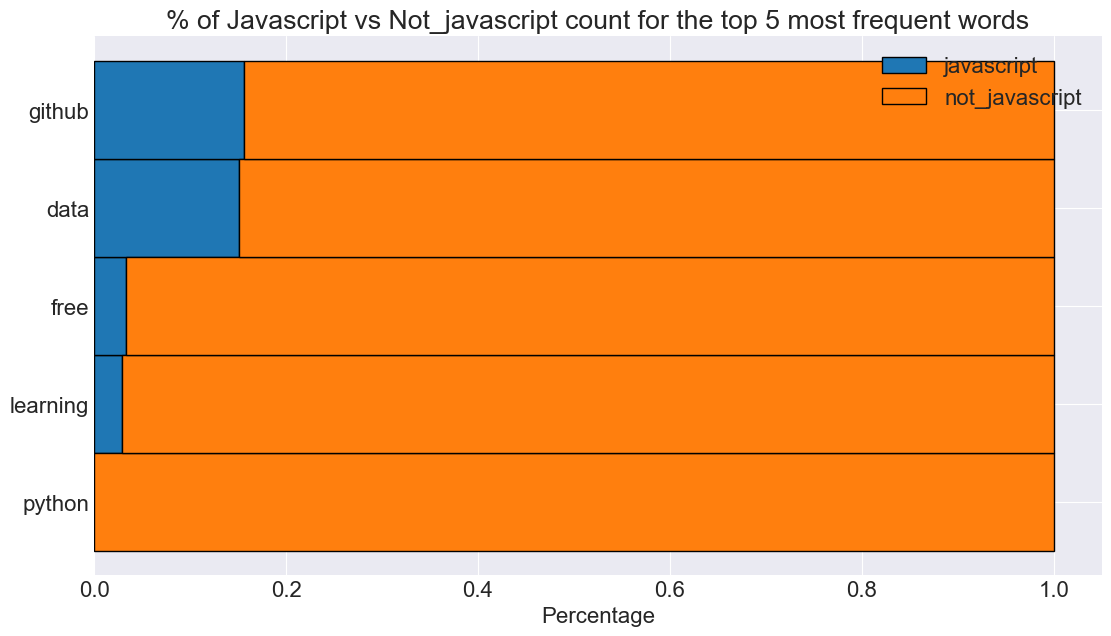

In [6]:
# Looking at just JavaScript hplot
java_obj.hplot_word_freq_viz(n=5, sort=lang)
# Looking at just JavaScript bplot stacked
java_obj.stacked_bplot_freq(n=5, sort=not_lang)

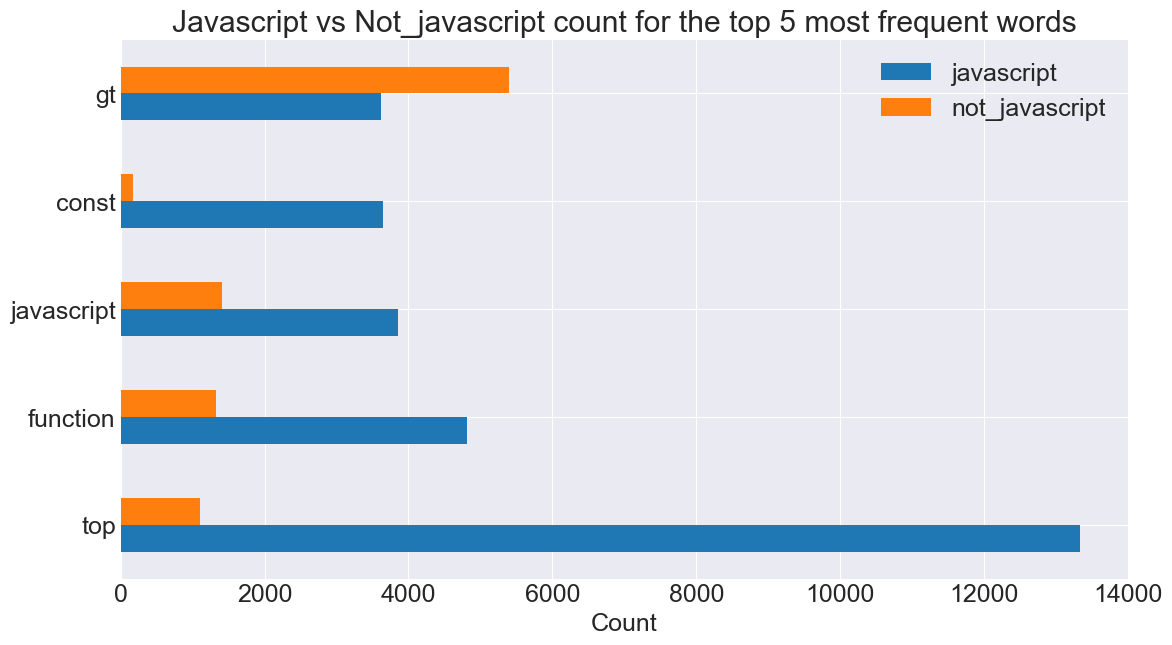

<Figure size 1600x900 with 0 Axes>

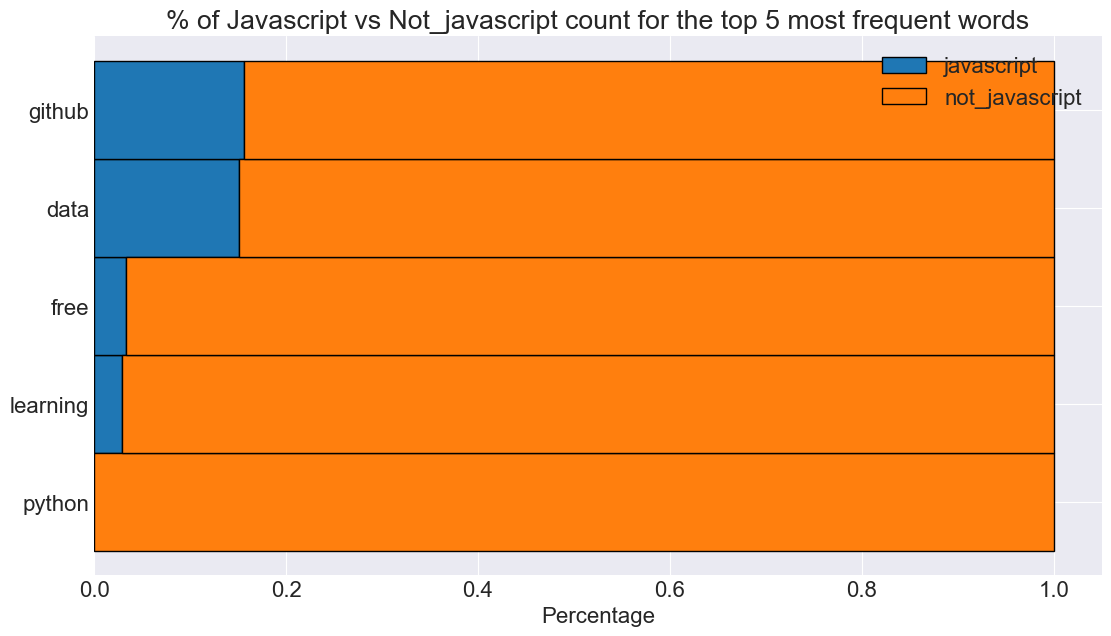

In [7]:
# Looking at just not_JavaScript hplot
java_obj.hplot_word_freq_viz(n=5, sort=lang)
# Looking at just not_JavaScript bplot stacked
java_obj.stacked_bplot_freq(n=5, sort=not_lang)

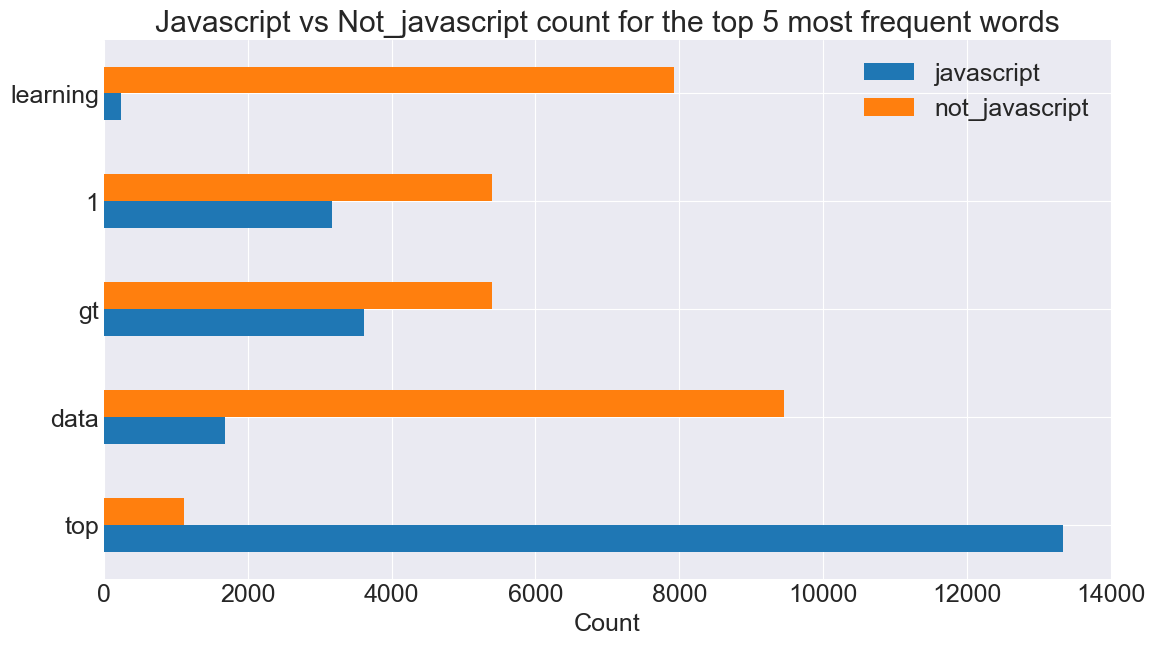

<Figure size 1600x900 with 0 Axes>

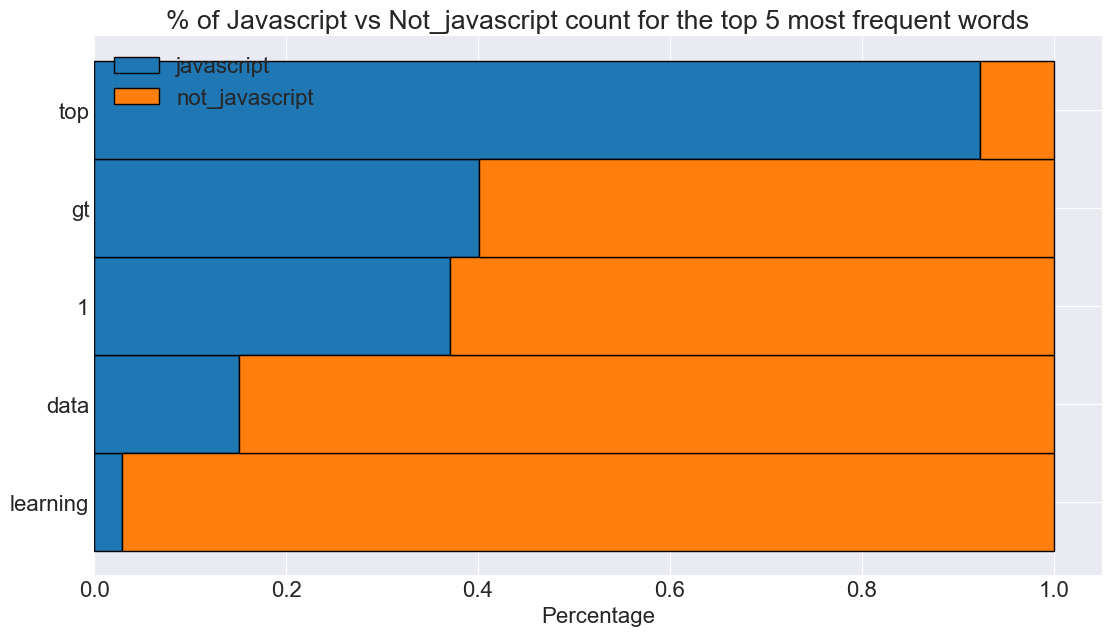

In [8]:
# Looking at just all hplot
java_obj.hplot_word_freq_viz(n=5)
# Looking at just all bplot stacked
java_obj.stacked_bplot_freq(n=5)

## Look at N-Grams Visualizations

### Look at Bigrams

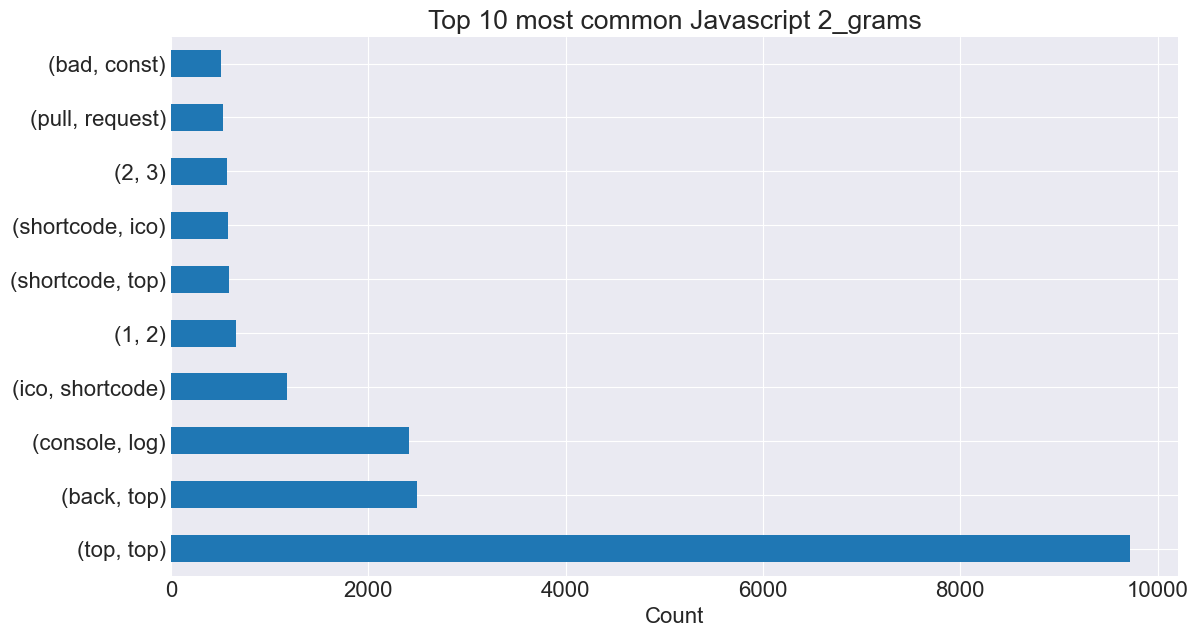

In [9]:
java_bigram = java_obj.n_gram(top_n= 10, col=lang)

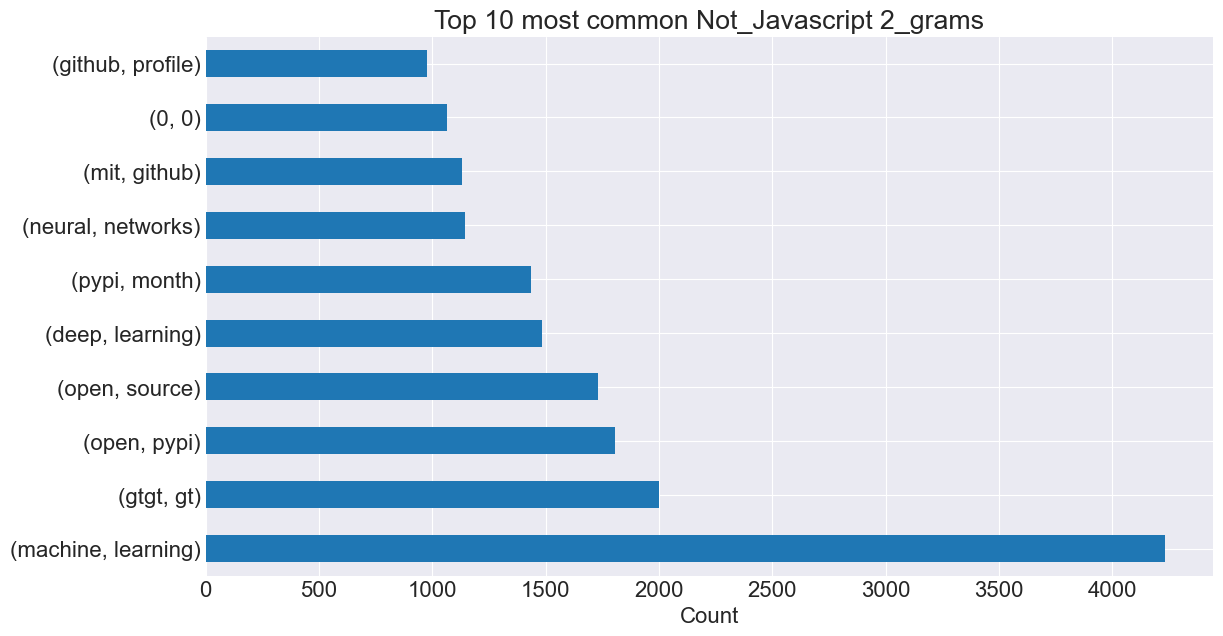

In [10]:
not_java_bigram = java_obj.n_gram(top_n = 10, col=not_lang)

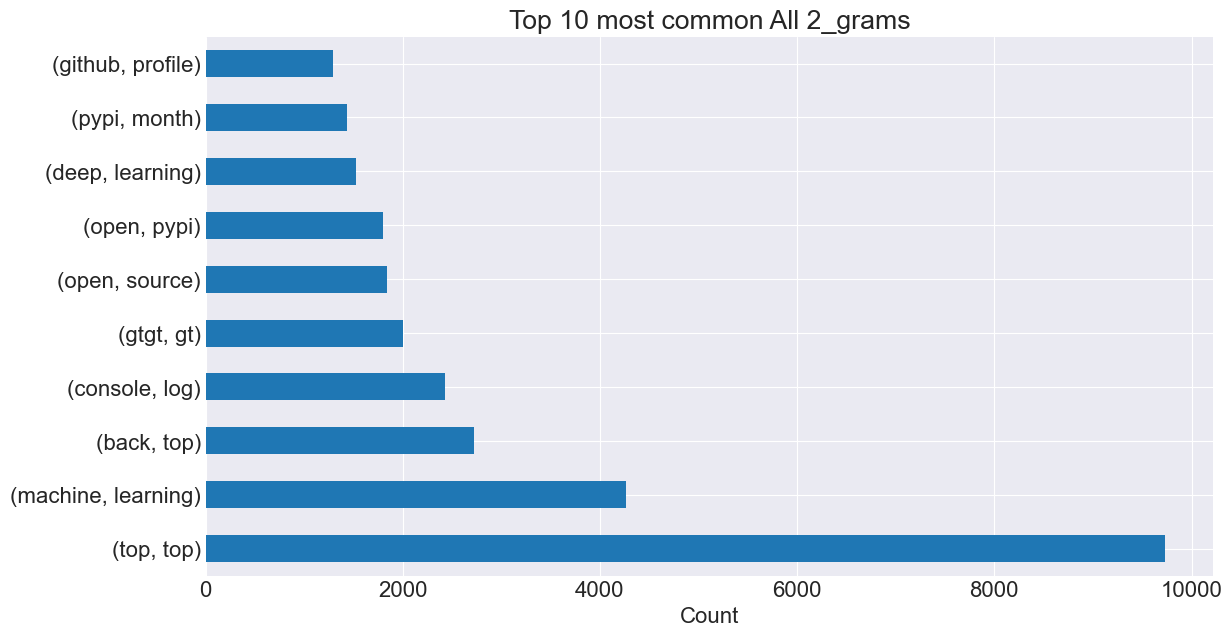

In [11]:
both_bigrams = java_obj.n_gram(top_n=10)

### Look at trigrams

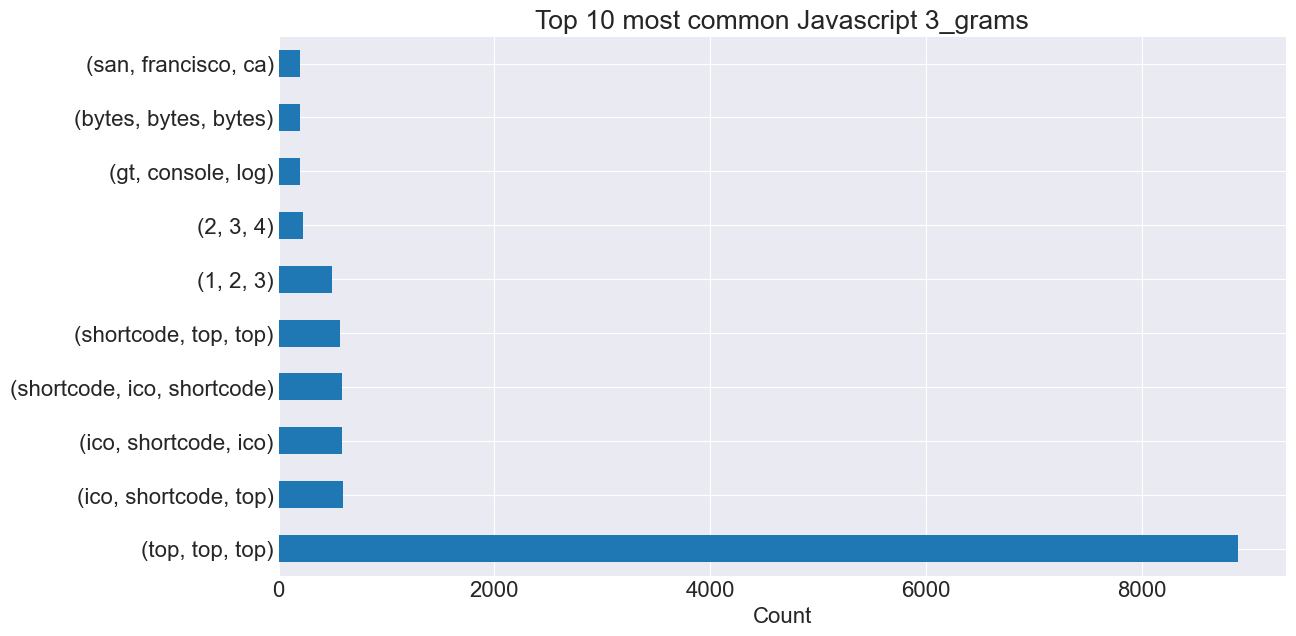

In [12]:
java_trigram = java_obj.n_gram(n=3, top_n=10, col=lang)

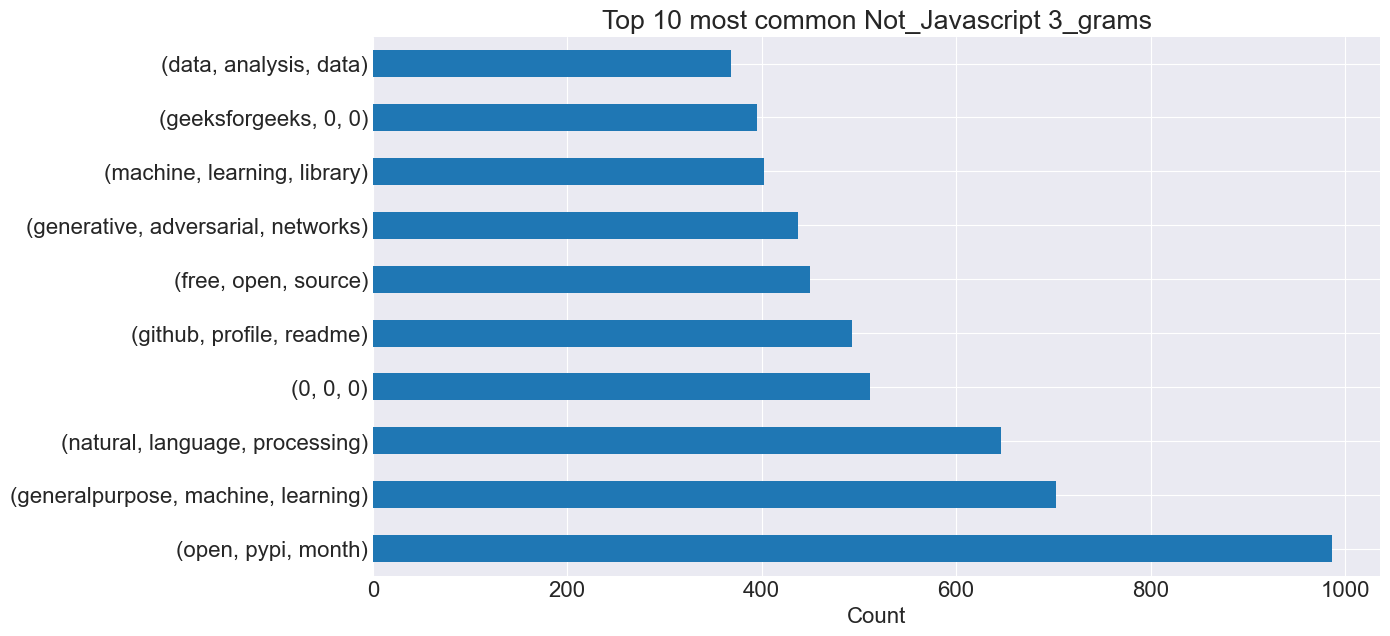

In [13]:
not_java_trigram = java_obj.n_gram(n=3, top_n=10, col=not_lang)

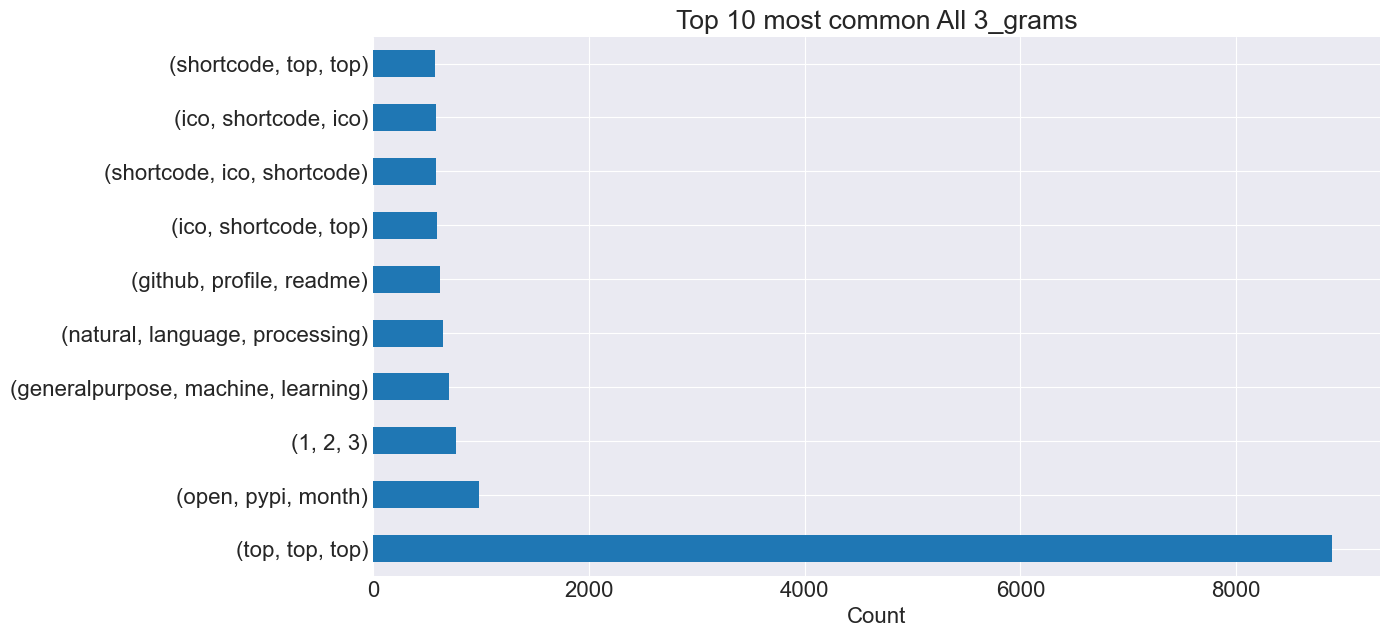

In [14]:
all_trigram = java_obj.n_gram(n=3, top_n=10)

### Plot some wordclouds

In [15]:
java_obj.plot_wordcloud(col=lang, save=True)

In [16]:
java_obj.plot_wordcloud(col=not_lang, save=True)

In [17]:
java_obj.plot_wordcloud(save=True)

## Add some sentiment analysis and some features

In [18]:
# Add sentiment analysis
java_obj.add_sentiment_analysis()
# Add features
java_obj.add_features()

java_obj.df.head()

,prog_lang,original,cleaned,label,stemmed,lemmatized,neg,neu,pos,compound,message_length,word_count,unique_word_count,avg_word_len
0,JavaScript,abhisheknaiidu The CLI Table of Contents Ins...,cli table contents installation built license ...,javascript,cli tabl content instal built licens instal en...,cli table content installation built license i...,0.0,0.866,0.134,0.6249,239,35,"{'cli': 3, 'built': 2, 'open': 2, 'license': 2...",6.83
2,JavaScript,Hacktoberfest 2020 🎉 🗣 Hacktoberfest encour...,open source community every year complete chal...,javascript,open sourc commun everi year complet challeng ...,open source community every year complete chal...,0.0,0.845,0.155,0.5574,184,27,"{'issues': 2, 'pull': 2, 'requests': 2, 'devel...",6.81
4,JavaScript,🚧 Todoist Stats ⚡️ 📌 Update your Todoist Sta...,stats update stats setup work youll need api t...,javascript,stat updat stat setup work youll need api toke...,stats update stats setup work youll need api t...,0.0,0.776,0.224,0.9847,915,160,"{'stats': 7, 'new': 7, 'go': 6, 'readme': 5, '...",5.72
8,JavaScript,Awesome Github Profile README A curated list o...,awesome github profile readme list awesome git...,javascript,awesom github profil readm list awesom github ...,awesome github profile readme list awesome git...,0.0,0.794,0.206,0.9963,2257,318,"{'github': 42, 'profile': 35, 'readme': 32, 'c...",7.10
70,JavaScript,Team Profile Generator Description The purpose...,team profile generator description purpose pro...,javascript,team profil gener descript purpos project crea...,team profile generator description purpose pro...,0.0,0.878,0.122,0.9686,1377,191,"{'software': 9, 'questions': 7, 'click': 6, 't...",7.21


## Sentiment analysis bivariate plots

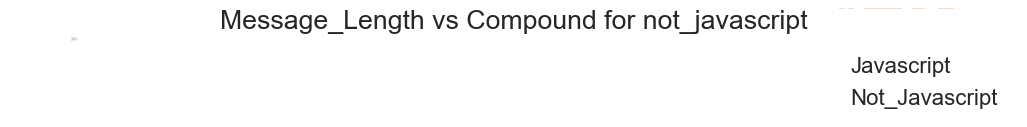

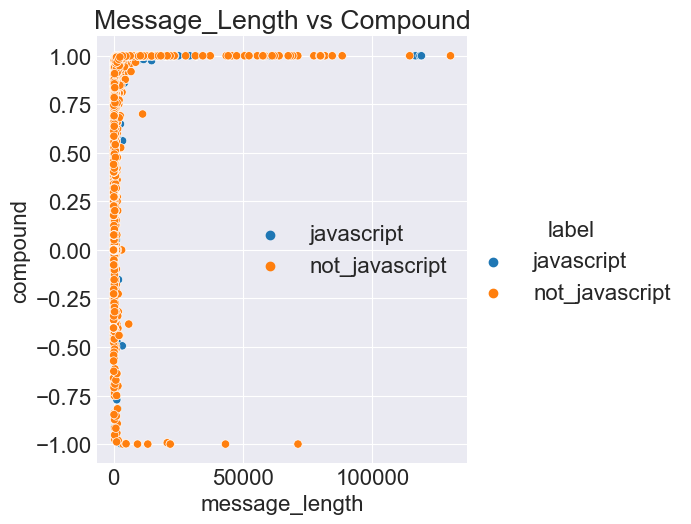

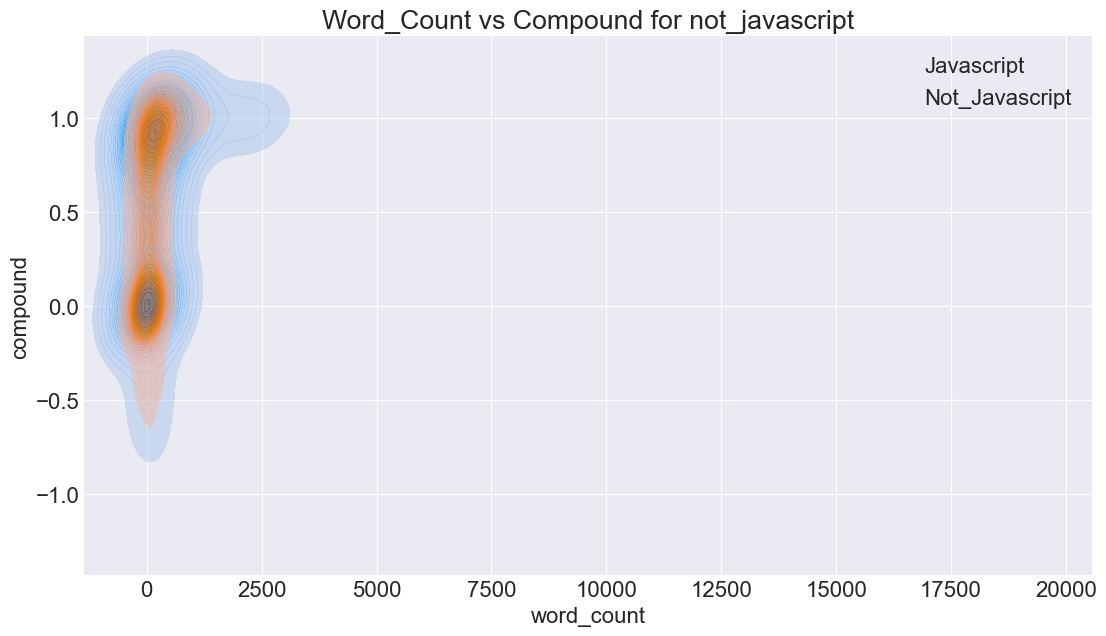

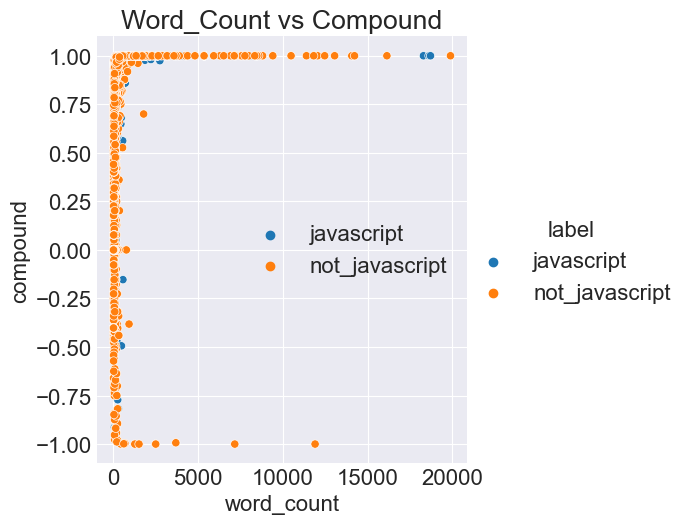

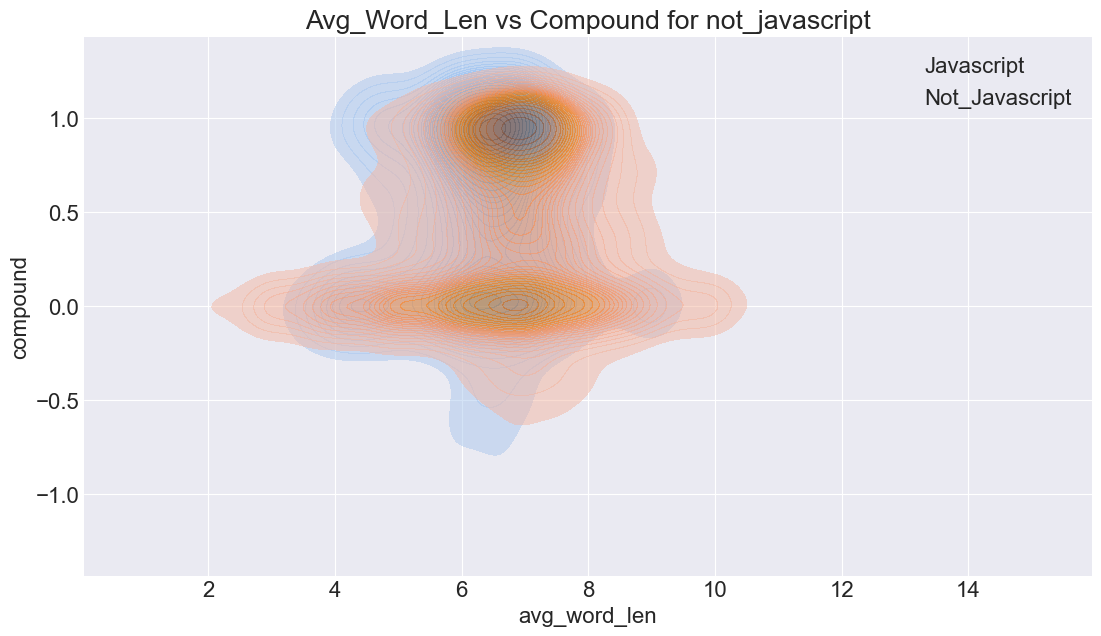

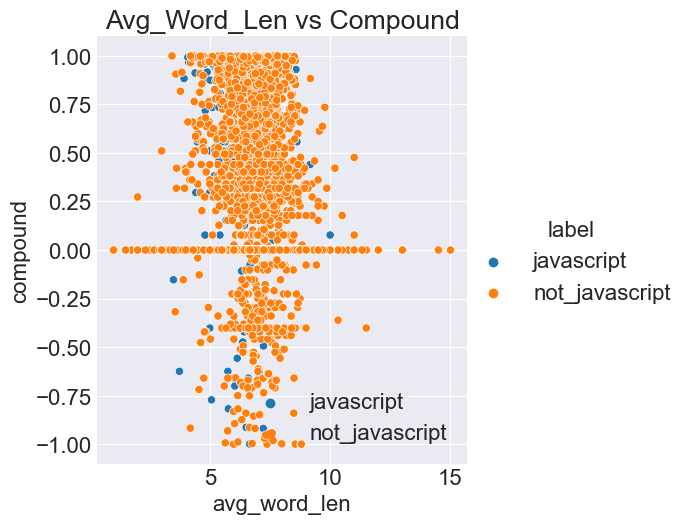

In [19]:
java_obj.sentiment_bivariate_plots()

## Sentiment distribution plots

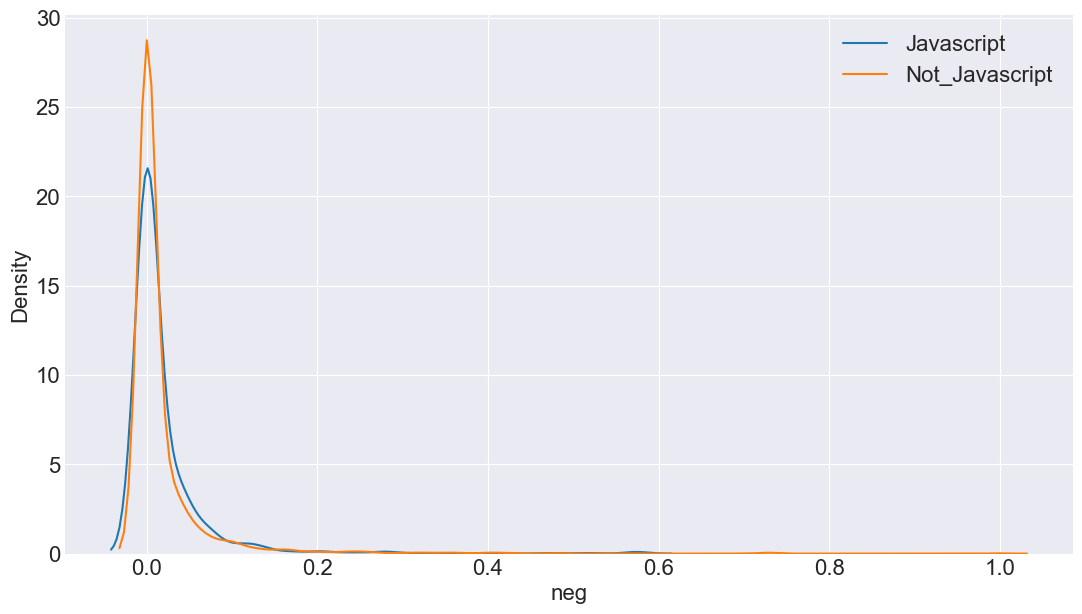

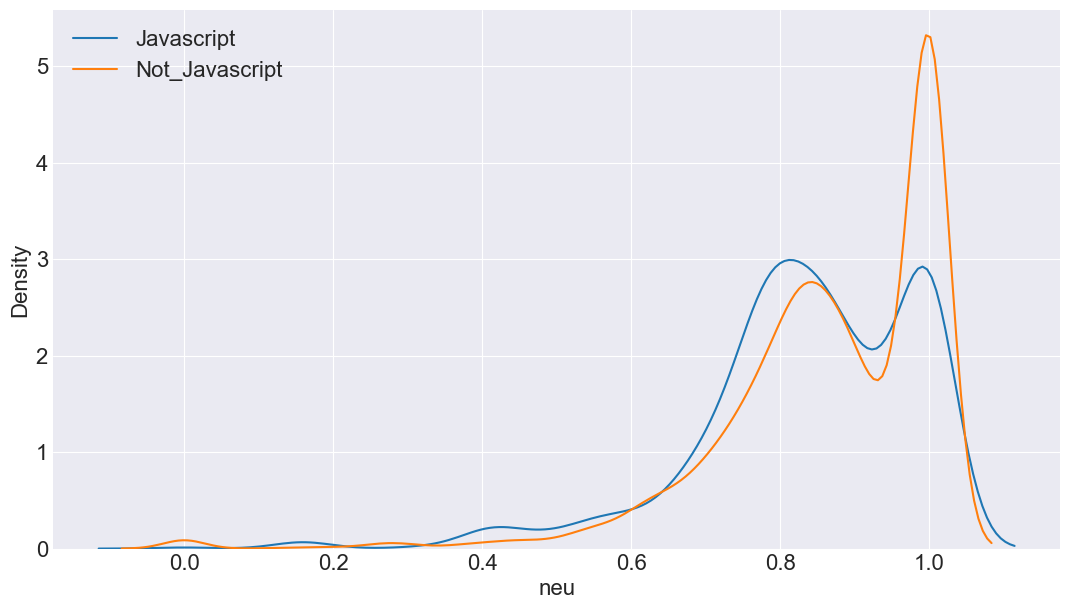

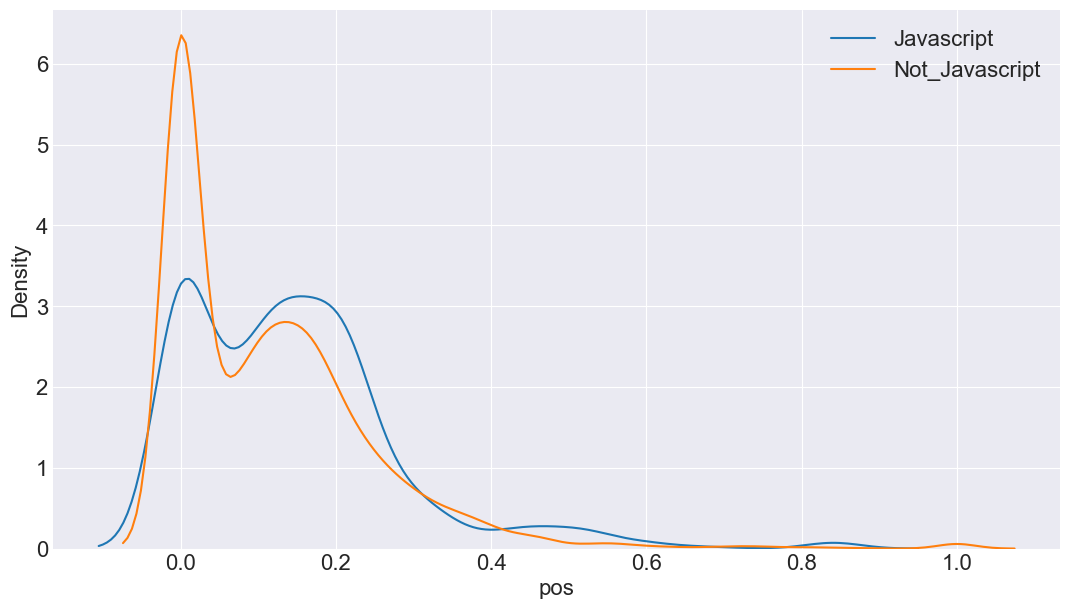

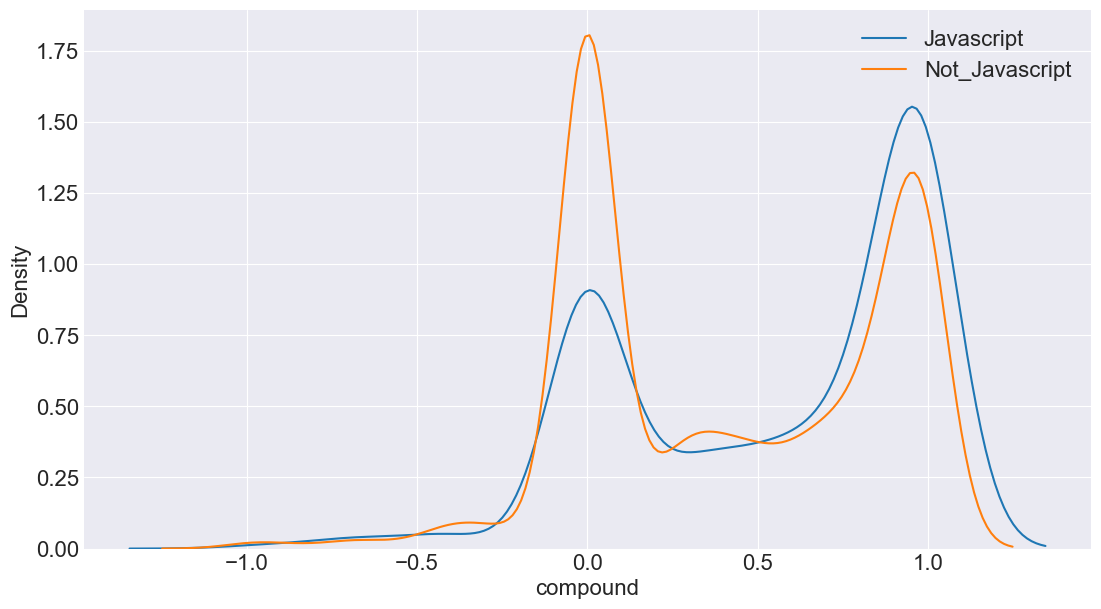

In [20]:
java_obj.sentiment_distributions()

In [21]:
%%html
<style>
table {margin-left: 0 !important;}
</style>

## Modeling

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [23]:
df.head()

,prog_lang,original,cleaned,label,stemmed,lemmatized
0,JavaScript,abhisheknaiidu The CLI Table of Contents Ins...,cli table contents installation built license ...,javascript,cli tabl content instal built licens instal en...,cli table content installation built license i...
2,JavaScript,Hacktoberfest 2020 🎉 🗣 Hacktoberfest encour...,open source community every year complete chal...,javascript,open sourc commun everi year complet challeng ...,open source community every year complete chal...
4,JavaScript,🚧 Todoist Stats ⚡️ 📌 Update your Todoist Sta...,stats update stats setup work youll need api t...,javascript,stat updat stat setup work youll need api toke...,stats update stats setup work youll need api t...
8,JavaScript,Awesome Github Profile README A curated list o...,awesome github profile readme list awesome git...,javascript,awesom github profil readm list awesom github ...,awesome github profile readme list awesome git...
70,JavaScript,Team Profile Generator Description The purpose...,team profile generator description purpose pro...,javascript,team profil gener descript purpos project crea...,team profile generator description purpose pro...


In [24]:
class NLP_model():
    ''' Creates classification models using a variety of Sklearn models.

        Models:
        ----------------------------------------------------------------
        KNeighborsClassifier, DecisionTreeClassifier, svm, GaussianNB, 
        MultinomialNB, GaussianProcessClassifier, MLPClassifier, RandomForestClassifier, AdaBoostClassifier
        ----------------------------------------------------------------
        
        Arguments:
            - data: Pandas DataFrame
            - classifiers: List of classification models
            - names: Names of classification models
            - lang: Specifies a language to create a lang/not_lang label from
            - top_langs: Specifies the top n langs to create labels for, non-top_langs will be labeled 'other'
    '''
    def __init__(self, data:pd.DataFrame, classifiers: list, names: list, lang = None, top_langs = None):
        ''' Passes dataframe, list of actual classifiers and their names, as well as checks 
            for kwargs lang or top_lang
            Creates a zip of classifiers and their names
        '''
        # Creating class instance of df
        self.df = data.copy(deep = True)
        
        #Checking for individual language specified or n_langs and creating label column
        # For individual lang specification
        if lang != None and top_langs == None: # Checking for lang
            self.lang = lang # assigning lang attribute
            # creating label column
            self.df['label'] = self.df.prog_lang.apply(lambda x: x.lower() if x == self.lang else f'not_{self.lang.lower()}')
        if top_langs != None and lang == None: # Checking for top_langs
            self.top_langs = self.df.prog_lang.value_counts()[:top_langs] # getting top n langs
            # Creating labels column from top n languages            
            self.df['label'] = self.df.prog_lang.apply(lambda x: x.lower() if x in self.top_langs else 'other')
        if lang != None and top_langs != None:
            raise AttributeError('Must specify either lang or top_langs, cant create labels for both.')
        if top_langs != None and top_langs < 2:
            raise AttributeError("Must specify more than one lang, if you want to check for a single language, use lang argument instead.")
        
        # Clean dataframe
        self.df.lemmatized = self.df.lemmatized.apply(basic_clean)
        
        # Creating class attributes
        self.classifiers = classifiers
        self.names = names
        
        models = zip(names, classifiers) # zipping models and names
        self.models = models
        
    def split(self, target = None):
        '''
        This function takes in a dataframe and, optionally, a target_var array. Performs a train, validate, 
        test split with no stratification. Returns train, validate, and test dfs.
        '''
        
        # Checking for y specified
        if target is None: # if no y, preform regular train, validate, test split
            train, test = train_test_split(self.df, test_size=.2, 
                                                    random_state=1312)
            
            self.train, self.test = train, validate, test # setting self versions of each df
            return train, test
        
        # If y is specified preform X/y train, validate, test split
        else:
            X_train, X_test, y_train, y_test = train_test_split(self.df.drop(columns = target), 
                                                                            self.df[target],
                                                                            test_size=.2, 
                                                                            random_state=1312)
            self.X_train, self.X_test,\
            self.y_train, self.y_test = X_train, X_test, y_train, y_test # attributes for each X/y df and array
            
            return X_train, X_test, y_train, y_test
    
    
    def tf(self):
        ''' Gets the term frequency of lematized column in the df
        '''
        
        # For each lemmatized doc, append to series
        docs = [] # init empty series for split documents
        words = [] # init empty series for unique words
        for doc in self.df['lemmatized'].values:
            for word in doc.split(): # iterating through each word in a split doc
                words.append(word) # add to words
        
        word_ser = pd.Series(words) # turn w
        
        # Creating a df from unique words containing raw term count, 
        tf_df = (pd.DataFrame({'raw_count': word_ser.value_counts()})) # raw counts of each term
        tf_df['frequency'] = tf_df.raw_count / tf_df.raw_count.sum() # frequency of each term
        tf_df['augmented_frequency'] = tf_df.frequency / tf_df.frequency.max() # augmented freq of words
        
        return tf_df
    
    def tf_idf(self):
        ''' Gets tf_idf and returns the dataframe of TfidVectorizer
        '''
        tfidf = TfidfVectorizer() # Make the opbject
        bag_of_words = tfidf.fit_transform(self.df['lemmatized'].values) # Fit_transform on lemmatized
        tfidf_df = pd.DataFrame(bag_of_words.todense(), columns=tfidf.get_feature_names()) # Wrapping in a dataframe
        return tfidf_df
    
    def count_vectorize(self, ngram_range = (1,1)):
        ''' Preforms a count vectorizeation with ngrams of n length.
            WARNING: If not cached on system can take a long time to process, 
            creates a cacehd csv for faster use in future iterations.
        '''
        # Checking for cached vectorized csv
        filename = 'Vectorized.csv'
        if os.path.isfile(filename):
            print('Vectorized.csv already exists on your machine! Pulling it now...')
            vector_df = pd.read_csv(filename) # Creating df from csv if present
        else:
            print('''Vectorized.csv does not exist on your local machine! Creating vectorized csv and dataframe now. 
                  Vectorization may take a while, please wait...''')
            # Using Bag of Words count vectorizer for hexamers
            cv = CountVectorizer(ngram_range=(1,1)) # make the object
            vectors = cv.fit_transform(self.df.lemmatized.values) # fit_transform on lemmatized col
            self.vocab_count = cv.vocabulary_
            # Wraps vectorized array in a dataframe with feature names as the columns
            vector_df = pd.DataFrame(vectors.todense(), columns = cv.get_feature_names())
            
            # Create cached csv
            vector_df.to_csv(filename, index=False)
            
            return vector_df
        
        # assigning vectorized dataframe as an attribute
        self.vectorized = vector_df.copy()
        
        return vector_df
        
    
    def metrics(self, metric_type = 'accuracy', splits = 3):
        ''' Checks for and encodes label column
            Creates a metrics df measuring metric_type, accuracy by default.
            Preforms a kfold a number of times determined by splits.
        '''
        try: # checking if label exists, if not raise KeyError, didnt specify a lang or top_langs
            self.df['label']
        except KeyError:
            return KeyError('Must specify language target in class to create models')
        
        try: # Checking if vectorization has already run, if yes there will be an attribute vectorized df
            self.vectorized
        except AttributeError: # If no vectorized attribute exists get vectorized df calling self.count_vectorize
            print('Have not run count_vectorize method yet, running now...')
            self.vectorized = self.count_vectorize()
            print('All done! Moving on to modeling, this may take a while...')
        target = 'label' # Setting target to label
        
        # checking for lang or top_langs
        if self.df[target].nunique() == 2: # If one lang chosen
            y_data = self.df[target].replace([f'{self.lang.lower()}', f'not_{self.lang.lower()}'], [1,0]) # Endode lang as 1 not_lang as 0
        else: # if top_langs
            lang_list = [l.lower() for l in list(self.top_langs.index)] # getting a list of all lower case langs in top lang
            lang_list.append('other') # appending 'other' label
            
            lang_encode = list(range(1, len(self.top_langs)+1)) # list of numbers to encode top_langs as
            lang_encode.append(0) # appending 0 for other
            y_data = self.df[target].replace(lang_list, lang_encode) # encoding top_langs
            
            
        result = [] # init empty results list
        for (name, classifier) in self.models: # iterate through zipped models
            kfold = KFold(n_splits = splits) # number of kfolds set to splits
            scores = cross_validate(classifier, self.vectorized, y_data, cv = kfold, scoring = metric_type) # cross validate on each kfold
            result.append(scores) # append to results
            
            msg = "{0}: Accuracy: {1}".format(name, scores['test_score'].mean())
            print(msg)
        
        results = [res['test_score'].mean() for res in result] # list comp to get mean of cross val tests for each model
        metrics_df = pd.DataFrame(data = zip(self.names, results), columns = ['model', metric_type]) # wrap zipped model names and results in dataframe
        return metrics_df.sort_values(by = [metric_type], ascending = False) # return sorted by metric

In [28]:
names = ['K Nearest Neighbors', 'Decision Tree', 'Random Forest', 
         'Gaussian N-Bayes', 'Multinomial N-Bayes']

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    DecisionTreeClassifier(max_depth = 5),
    RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1 ),
    GaussianNB(),
    MultinomialNB()
    ]

model_obj = NLP_model(df, classifiers, names, lang = 'Python')

In [ ]:
model_obj.tf_idf()

In [29]:
model_obj.metrics()

Have not run count_vectorize method yet, running now...
Vectorized.csv does not exist on your local machine! Creating vectorized csv and dataframe now. 
                  Vectorization may take a while, please wait...
All done! Moving on to modeling, this may take a while...
K Nearest Neighbors: Accuracy: 0.7094925570709881
Decision Tree: Accuracy: 0.8004374429198697
Random Forest: Accuracy: 0.4219851406536686
Gaussian N-Bayes: Accuracy: 0.6801415541519594
Multinomial N-Bayes: Accuracy: 0.7931084227645844


,model,accuracy
1,Decision Tree,0.800437
4,Multinomial N-Bayes,0.793108
0,K Nearest Neighbors,0.709493
3,Gaussian N-Bayes,0.680142
2,Random Forest,0.421985


### Modeling Performance:
##### Default Hyperparams:
- KNeighborsClassifier(n_neighbors = 3),
- DecisionTreeClassifier(max_depth = 5),
- RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1 ),
- GaussianNB(),
- MultinomialNB()


> #### First iteration: (75% threshol, no zscore)
> - K Nearest Neighbors: Accuracy: 0.4437958746786057
> - Decision Tree: Accuracy: 0.5243970413600353
> - Random Forest: Accuracy: 0.3019957833163259
> - Gaussian N-Bayes: Accuracy: 0.43499919463886333
> - Multinomial N-Bayes: Accuracy: 0.5169951603916912

> #### Second Iteration (75% lang threshold, zscore .5)
> - K Nearest Neighbors: Accuracy: 0.42000479731350443
> - Decision Tree: Accuracy: 0.6441992484208843
> - Random Forest: Accuracy: 0.6461981290477333
> - Gaussian N-Bayes: Accuracy: 0.5742384264811705
> - Multinomial N-Bayes: Accuracy: 0.6247701287279124

> #### Third Iteration (100% lang threshold, zscore .5)
> - K Nearest Neighbors: Accuracy: 0.7094925570709881
> - Decision Tree: Accuracy: 0.8004374429198697
> - Random Forest: Accuracy: 0.4219851406536686
> - Gaussian N-Bayes: Accuracy: 0.6801415541519594
> - Multinomial N-Bayes: Accuracy: 0.7931084227645844

In [ ]:
model_obj.tf()

In [ ]:
model_obj.tf_idf()